In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [5]:
# Load the dataset
import pandas as pd
data = pd.read_csv('diabetes.csv')


In [8]:
# 1.Imputasi missing value dengan mean, median, dan modus
mean = SimpleImputer(strategy='mean')
median = SimpleImputer(strategy='median')
modus = SimpleImputer(strategy='most_frequent')

data['Glucose'] = mean.fit_transform(data[['Glucose']])
data['BloodPressure'] = median.fit_transform(data[['BloodPressure']])
data['SkinThickness'] = modus.fit_transform(data[['SkinThickness']])
data['Insulin'] = mean.fit_transform(data[['Insulin']])
data['BMI'] = median.fit_transform(data[['BMI']])
data['DiabetesPedigreeFunction'] = mean.fit_transform(data[['DiabetesPedigreeFunction']])
data['Age'] = modus.fit_transform(data[['Age']])

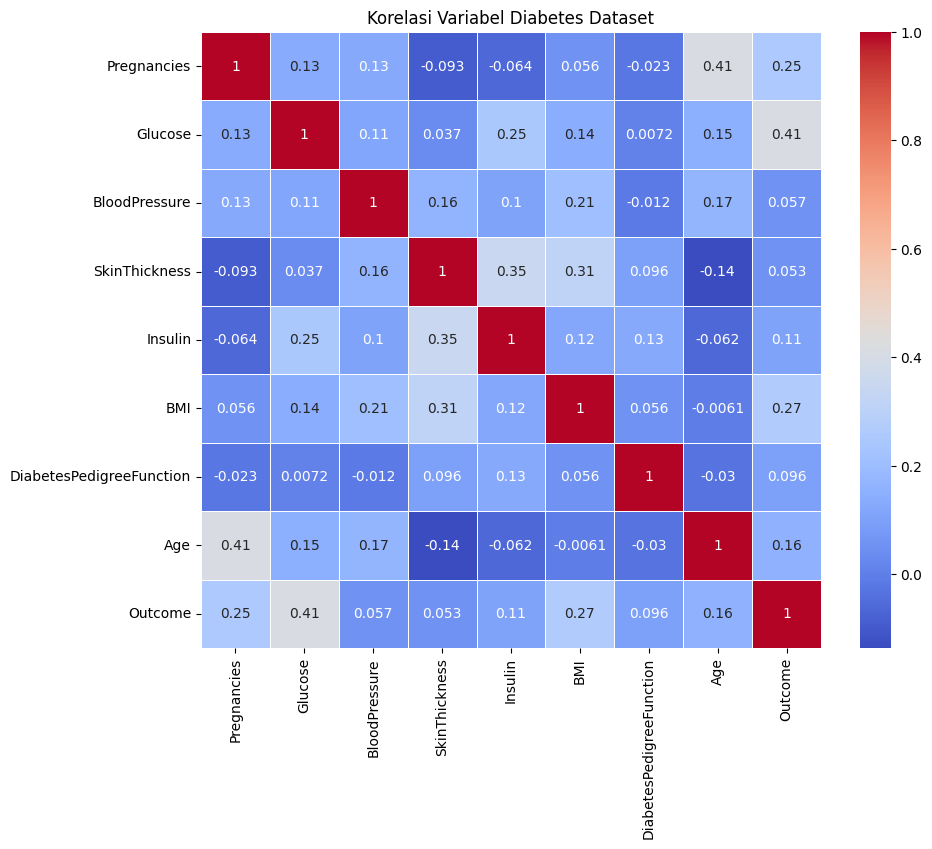

In [15]:
# 2. Korelasi antar variabel dengan heatmap
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Variabel Diabetes Dataset')
plt.show()

In [11]:
# 3. Imbalance handling dengan undersampling
mayoritas = data[data.Outcome == 0]
minoritas = data[data.Outcome == 1]

mayoritas_undersampling = resample(mayoritas, 
                                       replace=False,     
                                       n_samples=len(minoritas),   
                                       random_state=42)

diabetes = pd.concat([mayoritas_undersampling, minoritas])

In [14]:
# 4. Scaling  RobustScaler and MinMaxScaler
robustscaler = RobustScaler()
minmaxscaler = MinMaxScaler()

scaleddata_robust = robustscaler.fit_transform(diabetes.drop('Outcome', axis=1))
scaleddata_minmax = minmaxscaler.fit_transform(diabetes.drop('Outcome', axis=1))

# dataframe
scaleddata_robust_df = pd.DataFrame(scaleddata_robust, columns=diabetes.columns[:-1])
scaleddata_minmax_df = pd.DataFrame(scaleddata_minmax, columns=diabetes.columns[:-1])
print("Scaled Data RobustScaler:")
print(scaleddata_robust_df.head())

print("\nScaled Data MinMaxScaler:")
print(scaleddata_minmax_df.head())


Scaled Data RobustScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         -0.4 -0.710984      -0.166667        0.56250  0.000000  0.000000   
1          0.4  0.000000      -2.000000       -0.68750 -0.807123  0.378049   
2          0.0 -0.286742      -1.166667        0.28125 -0.345181 -0.646341   
3         -0.2  0.258713       1.000000       -0.68750 -0.807123 -1.012195   
4          0.8 -0.559469       0.166667        0.56250  0.000000  1.231707   

   DiabetesPedigreeFunction     Age  
0                 -0.378594  0.1250  
1                  1.014377 -0.1875  
2                 -1.073706 -0.3750  
3                 -0.167732 -0.0625  
4                 -0.423323 -0.3750  

Scaled Data MinMaxScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.487437       0.614035       0.404040  0.141581  0.479136   
1     0.294118  0.605339       0.421053       0.000000  0.000000  0.502235   
2     0.176471  